In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Chargement des données
from scipy.io import loadmat
data_at2 = loadmat('Données/data_at2.mat') 
X=data_at2["X"]
#On convertit la liste en dataframe
data=pd.DataFrame(X)

data

,0,1,2,3,4,5
0,10.461761,12.042012,15.480609,15.434644,11.321380,17.967074
1,18.655836,5.009348,1.518254,5.382335,-2.545660,20.893867
2,10.249639,19.277903,4.633640,15.431294,-8.451043,-4.593282
3,14.419228,-0.974588,8.789751,17.583342,3.132548,8.535459
4,9.384266,19.804038,8.554809,9.168119,7.295258,16.639839
...,...,...,...,...,...,...
745,55.769826,27.719924,57.692206,56.550050,4.140012,8.560532
746,77.245900,4.124367,55.164332,51.799429,18.837836,10.477335
747,25.267960,28.889218,67.211093,62.768100,15.493784,18.906650
748,72.813217,108.714148,54.040380,70.739153,-4.166961,1.343332


**Pour le test CUSUM :**

In [3]:
def test_CUSUM(X,K,hA):

    N=len(X) # la taille du signal

    #On initialise à zéros les vecteurs de sorties
    G=np.zeros(N)
    H=np.zeros(N)

    mu=np.mean(X[:50]) #La moyenne des 50 premiers echantillons du signal

    for i in range(N):
        delta=np.abs(X[i]-mu)
        G[i]=max(0,G[i-1]+delta-K) # calcul du saut à l'étape i

        #on test si le seuil est dépasser ou non

        if G[i]>hA:
            H[i]=1 
        else:
            H[i]=0
    
    return H, G

In [4]:

Y=X.transpose()[1] #test avec le premier signal X1

len(Y)

[H,G]=test_CUSUM(Y,30,10)

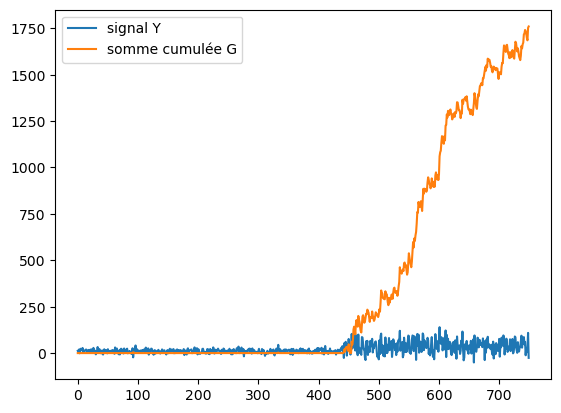

In [16]:

plt.plot(Y,label='signal Y')
plt.plot(G, label='somme cumulée G')
plt.legend()
plt.show()


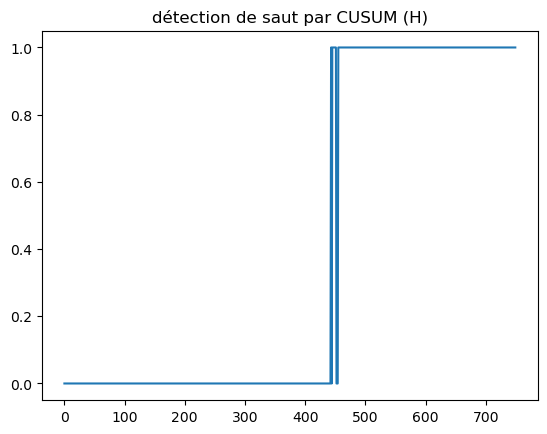

In [15]:
plt.plot(H, label='H')
plt.title("détection de saut par CUSUM (H)")

plt.show()


**La fonction test_EWMA**

In [7]:
def test_EWMA(X,WL,k):
    N=len(X)
    H_E=np.zeros(N)
    LA=np.zeros(N)
    HA=np.zeros(N)
   

    for i in range(0,N-WL):

        mu_EWMA=np.mean(X[i:WL+i])
        sigma_EWMA=np.std(X[i:WL+i])
        
      
        LA[i]=mu_EWMA-k*sigma_EWMA
        HA[i]=mu_EWMA+k*sigma_EWMA
        

        if X[i]>HA[i] or X[i]<LA[i]:

            H_E[i]=0
            
        else :

            H_E[i]=1
    
   
    return H_E, LA, HA

In [8]:
[H_E,LA,HA]=test_EWMA(Y,30,2)


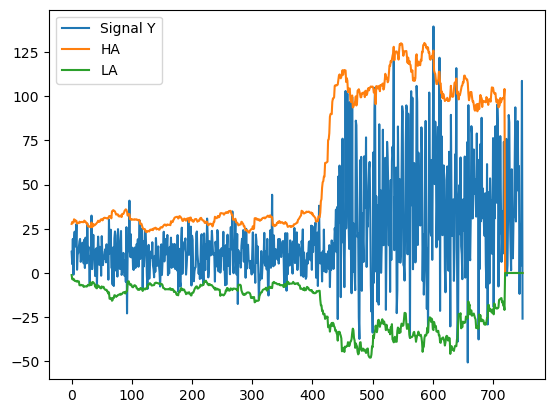

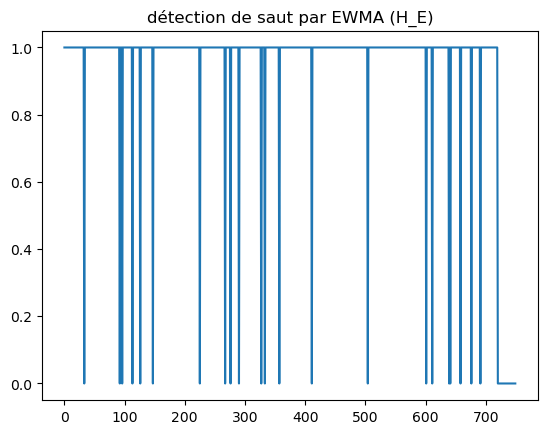

In [14]:

plt.plot(Y, label='Signal Y')
plt.plot(HA, label='HA')
plt.plot(LA, label='LA')
plt.legend()
plt.show()
plt.plot(H_E, label='H_E')
plt.title("détection de saut par EWMA (H_E)")

plt.show()